# IMPLEMENTATION OF OUR OWN AI ALGORITHM

Erfasser :

| Name | Matrikelnummer | E-Mail |
| :- | :- | :- |
| **Muhammad Abiyyu Mufti Hanif** | 60750 | hamu1013@h-ka.de |
| **Davin Farrell Lukito** | 75420 | luda1013@h-ka.de |

In this work, we are implementing 4 AI Methods:
- Decision Tree
- Random Forest
- K - Nearest Neighbor
- Convolutional Neural Networks


## Loading Data from Image Resources

In [15]:
# listing all images inside the resources!
from our_own_ai_process import OurDecisionTree, OurRandomForrest, OurKNearestNeighbour, OurCNN
from preprocessing import ImageResizer, FeatureExtraction, SimpleDatasetLoader
from imutils import paths
from preprocessing.image_to_array import ImageToArrayPreprocessor

In [16]:
# listing all images inside the resources!
imagePaths = list(paths.list_images("resources/"))
# initialize the image resizer, load the dataset from disk, and reshape the data matrix
sp = ImageResizer(256, 256)
# another image resizer for data in cnn
sp2 = ImageResizer(32, 32)
# initialize the feature extractor that will save it to csv file
f_ext = FeatureExtraction()
# initialize the converter to array using keras, will be use in cnn
iap = ImageToArrayPreprocessor()

# initialize data set loader that will load the images and do the preprocessing before it
sdl = SimpleDatasetLoader(preprocessors=[sp, f_ext, sp2, iap])

[INFO] loading images...
[INFO] processed 100/800
[INFO] processed 200/800
[INFO] processed 300/800
[INFO] processed 400/800
[INFO] processed 500/800
[INFO] processed 600/800
[INFO] processed 700/800
[INFO] processed 800/800


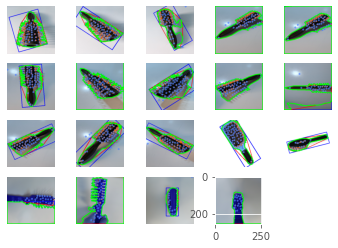

In [17]:
print("[INFO] loading images...")
# load the images
(data, label) = sdl.load(imagePaths, verbose=100, show=20)

In [18]:
# extraction direct to panda data frame
df = f_ext.extract_to_panda(label)
df.sample(10)
# extract to the csv file
# uncomment to extract to a csv file
# f_ext.extract_to_table("features.csv", labels)

,n_corner,n_h_corner,n_contour,a_rect,a_hull,a_approx,l_perimeters,wide/length,perim/a_rect,perim/a_hull,...,corner/a_hull,corner/a_appx,corner/l_perim,h_corner/a_rect,h_corner/a_hull,h_corner/a_appx,h_corner/l_perim,extent,solidity,labels
282,64,2005,2,51765.000000,33928.5,27398.0,885.161468,1.256158,0.017100,0.026089,...,0.001886,0.002336,0.072303,0.038733,0.059095,0.073181,2.265123,0.529277,0.807522,0
119,100,388,16,13514.996437,12659.0,10209.5,698.208151,4.811321,0.051662,0.055155,...,0.007900,0.009795,0.143224,0.028709,0.030650,0.038004,0.555708,0.755420,0.806501,0
246,51,292,2,34425.000000,33291.0,29003.5,822.509666,0.529412,0.023893,0.024707,...,0.001532,0.001758,0.062005,0.008482,0.008771,0.010068,0.355011,0.842513,0.871211,0
277,65,1005,1,65025.000000,65025.0,53343.5,1577.060963,1.000000,0.024253,0.024253,...,0.001000,0.001219,0.041216,0.015456,0.015456,0.018840,0.637261,0.820354,0.820354,0
568,45,545,2,30090.000000,29208.0,28403.0,744.384776,0.462745,0.024739,0.025486,...,0.001541,0.001584,0.060453,0.018112,0.018659,0.019188,0.732148,0.943935,0.972439,1
271,85,268,4,32779.325267,24609.0,20818.5,1149.460020,2.698877,0.035067,0.046709,...,0.003454,0.004083,0.073948,0.008176,0.010890,0.012873,0.233153,0.635111,0.845971,0
413,66,324,2,18597.383043,16738.5,15094.0,672.749343,3.949265,0.036174,0.040192,...,0.003943,0.004373,0.098105,0.017422,0.019357,0.021465,0.481606,0.811620,0.901753,1
410,26,154,2,31874.992294,31639.5,28276.5,801.982755,2.040000,0.025160,0.025348,...,0.000822,0.000919,0.032420,0.004831,0.004867,0.005446,0.192024,0.887106,0.893709,1
698,100,247,19,45864.318478,34708.0,18894.5,1967.928056,2.137261,0.042908,0.056700,...,0.002881,0.005293,0.050815,0.005385,0.007117,0.013073,0.125513,0.411965,0.544385,1
93,71,459,4,26285.122947,19442.0,16537.5,790.558437,0.518676,0.030076,0.040662,...,0.003652,0.004293,0.089810,0.017462,0.023609,0.027755,0.580602,0.629158,0.850607,0


## Decision Tree

In [19]:
ODT = OurDecisionTree()
ODT.fit(df, 0.1)
ODT.train()
# ODT.plot_tree()

In [20]:
ODT.predict()
print(*ODT.review())

              precision    recall  f1-score   support

       brush       0.66      0.60      0.63        35
        comb       0.71      0.76      0.73        45

    accuracy                           0.69        80
   macro avg       0.68      0.68      0.68        80
weighted avg       0.69      0.69      0.69        80
 [[21 14]
 [11 34]]


## Random Forest

In [21]:
ORF = OurRandomForrest()
ORF.fit(df, 0.1)
ORF.train()
ORF.predict()
print(*ORF.review())

              precision    recall  f1-score   support

       brush       0.77      0.82      0.80        40
        comb       0.81      0.75      0.78        40

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80
 [[33  7]
 [10 30]]


## K-Nearest Neighbor

In [22]:
fiveNearestNeighbour = OurKNearestNeighbour(5, "euclidean")
fiveNearestNeighbour.fit(df, 0.10)
fiveNearestNeighbour.predict()
print(*fiveNearestNeighbour.review())

              precision    recall  f1-score   support

       brush       0.69      0.92      0.79        36
        comb       0.91      0.66      0.76        44

    accuracy                           0.78        80
   macro avg       0.80      0.79      0.77        80
weighted avg       0.81      0.78      0.77        80
 [[33  3]
 [15 29]]


## Convolutional Neural Networks

In [23]:
# Epoch 500
# Batch 100
# Learning Rate 0.01
# Shape - Input Image (32,32,3)

cnn = OurCNN(32, 32, 3, 0.01, 100, 500)
cnn.fit((data, label), 0.10)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 65538     
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
Total params: 66,434
Trainable params: 66,434
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
cnn.train()

Epoch 1/500
8/8 [==============================] - 1s 74ms/step - loss: 0.7164 - accuracy: 0.5167 - val_loss: 0.7345 - val_accuracy: 0.4875
Epoch 2/500
8/8 [==============================] - 0s 51ms/step - loss: 0.7240 - accuracy: 0.4958 - val_loss: 0.7241 - val_accuracy: 0.4875
Epoch 3/500
8/8 [==============================] - 0s 51ms/step - loss: 0.6816 - accuracy: 0.5403 - val_loss: 0.6996 - val_accuracy: 0.4875
Epoch 4/500
8/8 [==============================] - 0s 52ms/step - loss: 0.7027 - accuracy: 0.5083 - val_loss: 0.9794 - val_accuracy: 0.5125
Epoch 5/500
8/8 [==============================] - 0s 53ms/step - loss: 0.7245 - accuracy: 0.5569 - val_loss: 0.6835 - val_accuracy: 0.5000
Epoch 6/500
8/8 [==============================] - 0s 52ms/step - loss: 0.6903 - accuracy: 0.5458 - val_loss: 0.6644 - val_accuracy: 0.6250
Epoch 7/500
8/8 [==============================] - 0s 51ms/step - loss: 0.6680 - accuracy: 0.6083 - val_loss: 0.7918 - val_accuracy: 0.4875
Epoch 8/500
8/8 [===

8/8 [==============================] - 0s 60ms/step - loss: 0.6014 - accuracy: 0.6833 - val_loss: 0.6326 - val_accuracy: 0.6750
Epoch 59/500
8/8 [==============================] - 0s 59ms/step - loss: 0.5854 - accuracy: 0.7014 - val_loss: 0.6687 - val_accuracy: 0.6125
Epoch 60/500
8/8 [==============================] - 1s 81ms/step - loss: 0.5899 - accuracy: 0.6972 - val_loss: 0.6984 - val_accuracy: 0.5875
Epoch 61/500
8/8 [==============================] - 1s 119ms/step - loss: 0.6073 - accuracy: 0.6708 - val_loss: 0.6406 - val_accuracy: 0.6500
Epoch 62/500
8/8 [==============================] - 1s 107ms/step - loss: 0.5918 - accuracy: 0.6875 - val_loss: 0.8036 - val_accuracy: 0.5500
Epoch 63/500
8/8 [==============================] - 1s 77ms/step - loss: 0.6001 - accuracy: 0.6944 - val_loss: 0.7391 - val_accuracy: 0.5875
Epoch 64/500
8/8 [==============================] - 0s 62ms/step - loss: 0.5900 - accuracy: 0.6931 - val_loss: 0.7425 - val_accuracy: 0.5875
Epoch 65/500
8/8 [======

8/8 [==============================] - 0s 49ms/step - loss: 0.5307 - accuracy: 0.7347 - val_loss: 0.7629 - val_accuracy: 0.5625
Epoch 117/500
8/8 [==============================] - 0s 47ms/step - loss: 0.5730 - accuracy: 0.7000 - val_loss: 0.9075 - val_accuracy: 0.5125
Epoch 118/500
8/8 [==============================] - 0s 48ms/step - loss: 0.5529 - accuracy: 0.7181 - val_loss: 0.6225 - val_accuracy: 0.6625
Epoch 119/500
8/8 [==============================] - 0s 48ms/step - loss: 0.5380 - accuracy: 0.7278 - val_loss: 0.7492 - val_accuracy: 0.6000
Epoch 120/500
8/8 [==============================] - 0s 47ms/step - loss: 0.5414 - accuracy: 0.7417 - val_loss: 0.6003 - val_accuracy: 0.6750
Epoch 121/500
8/8 [==============================] - 0s 49ms/step - loss: 0.5381 - accuracy: 0.7292 - val_loss: 0.6183 - val_accuracy: 0.6750
Epoch 122/500
8/8 [==============================] - 0s 48ms/step - loss: 0.5401 - accuracy: 0.7250 - val_loss: 0.6276 - val_accuracy: 0.6250
Epoch 123/500
8/8 [=

Epoch 174/500
8/8 [==============================] - 0s 64ms/step - loss: 0.4761 - accuracy: 0.7819 - val_loss: 0.5994 - val_accuracy: 0.6875
Epoch 175/500
8/8 [==============================] - 0s 58ms/step - loss: 0.4757 - accuracy: 0.7931 - val_loss: 0.6093 - val_accuracy: 0.6375
Epoch 176/500
8/8 [==============================] - 0s 58ms/step - loss: 0.4704 - accuracy: 0.7819 - val_loss: 0.6678 - val_accuracy: 0.6500
Epoch 177/500
8/8 [==============================] - 0s 57ms/step - loss: 0.5213 - accuracy: 0.7306 - val_loss: 0.6240 - val_accuracy: 0.6625
Epoch 178/500
8/8 [==============================] - 0s 56ms/step - loss: 0.4707 - accuracy: 0.7917 - val_loss: 0.6315 - val_accuracy: 0.6250
Epoch 179/500
8/8 [==============================] - 1s 80ms/step - loss: 0.4937 - accuracy: 0.7486 - val_loss: 0.6085 - val_accuracy: 0.6625
Epoch 180/500
8/8 [==============================] - 1s 64ms/step - loss: 0.4871 - accuracy: 0.7708 - val_loss: 0.6411 - val_accuracy: 0.6625
Epoch 

Epoch 232/500
8/8 [==============================] - 1s 71ms/step - loss: 0.4533 - accuracy: 0.7875 - val_loss: 0.5991 - val_accuracy: 0.6875
Epoch 233/500
8/8 [==============================] - 1s 71ms/step - loss: 0.4429 - accuracy: 0.7986 - val_loss: 0.5690 - val_accuracy: 0.7125
Epoch 234/500
8/8 [==============================] - 1s 71ms/step - loss: 0.4469 - accuracy: 0.8139 - val_loss: 0.6979 - val_accuracy: 0.6125
Epoch 235/500
8/8 [==============================] - 1s 75ms/step - loss: 0.4325 - accuracy: 0.8236 - val_loss: 0.5969 - val_accuracy: 0.7000
Epoch 236/500
8/8 [==============================] - 1s 69ms/step - loss: 0.4471 - accuracy: 0.7875 - val_loss: 0.5694 - val_accuracy: 0.6875
Epoch 237/500
8/8 [==============================] - 1s 69ms/step - loss: 0.4265 - accuracy: 0.8250 - val_loss: 0.6187 - val_accuracy: 0.6625
Epoch 238/500
8/8 [==============================] - 1s 72ms/step - loss: 0.4357 - accuracy: 0.8056 - val_loss: 0.5774 - val_accuracy: 0.6875
Epoch 

8/8 [==============================] - 1s 77ms/step - loss: 0.4027 - accuracy: 0.8264 - val_loss: 0.5950 - val_accuracy: 0.6875
Epoch 290/500
8/8 [==============================] - 1s 76ms/step - loss: 0.3908 - accuracy: 0.8458 - val_loss: 0.6056 - val_accuracy: 0.7000
Epoch 291/500
8/8 [==============================] - 1s 69ms/step - loss: 0.4082 - accuracy: 0.8236 - val_loss: 0.5669 - val_accuracy: 0.7000
Epoch 292/500
8/8 [==============================] - 1s 71ms/step - loss: 0.3872 - accuracy: 0.8556 - val_loss: 0.7246 - val_accuracy: 0.6500
Epoch 293/500
8/8 [==============================] - 1s 70ms/step - loss: 0.4312 - accuracy: 0.8069 - val_loss: 0.5499 - val_accuracy: 0.7625
Epoch 294/500
8/8 [==============================] - 1s 71ms/step - loss: 0.3993 - accuracy: 0.8347 - val_loss: 0.5599 - val_accuracy: 0.7500
Epoch 295/500
8/8 [==============================] - 1s 72ms/step - loss: 0.3877 - accuracy: 0.8583 - val_loss: 0.6216 - val_accuracy: 0.6750
Epoch 296/500
8/8 [=

Epoch 347/500
8/8 [==============================] - 1s 84ms/step - loss: 0.3653 - accuracy: 0.8486 - val_loss: 0.5704 - val_accuracy: 0.6875
Epoch 348/500
8/8 [==============================] - 1s 80ms/step - loss: 0.3582 - accuracy: 0.8569 - val_loss: 0.6180 - val_accuracy: 0.6875
Epoch 349/500
8/8 [==============================] - 1s 83ms/step - loss: 0.3603 - accuracy: 0.8569 - val_loss: 0.5712 - val_accuracy: 0.7250
Epoch 350/500
8/8 [==============================] - 1s 81ms/step - loss: 0.3827 - accuracy: 0.8250 - val_loss: 0.6034 - val_accuracy: 0.6875
Epoch 351/500
8/8 [==============================] - 1s 66ms/step - loss: 0.3555 - accuracy: 0.8639 - val_loss: 0.5399 - val_accuracy: 0.7375
Epoch 352/500
8/8 [==============================] - 0s 57ms/step - loss: 0.3579 - accuracy: 0.8569 - val_loss: 0.5416 - val_accuracy: 0.7375
Epoch 353/500
8/8 [==============================] - 0s 62ms/step - loss: 0.3563 - accuracy: 0.8611 - val_loss: 0.6217 - val_accuracy: 0.6875
Epoch 

8/8 [==============================] - 1s 75ms/step - loss: 0.3235 - accuracy: 0.8903 - val_loss: 0.6411 - val_accuracy: 0.6625
Epoch 405/500
8/8 [==============================] - 1s 71ms/step - loss: 0.3502 - accuracy: 0.8681 - val_loss: 0.5540 - val_accuracy: 0.7375
Epoch 406/500
8/8 [==============================] - 1s 78ms/step - loss: 0.3612 - accuracy: 0.8528 - val_loss: 0.5349 - val_accuracy: 0.7500
Epoch 407/500
8/8 [==============================] - 1s 74ms/step - loss: 0.3308 - accuracy: 0.8708 - val_loss: 0.5606 - val_accuracy: 0.7375
Epoch 408/500
8/8 [==============================] - 1s 76ms/step - loss: 0.3222 - accuracy: 0.9014 - val_loss: 0.5938 - val_accuracy: 0.6750
Epoch 409/500
8/8 [==============================] - 1s 82ms/step - loss: 0.3281 - accuracy: 0.8861 - val_loss: 0.5576 - val_accuracy: 0.7250
Epoch 410/500
8/8 [==============================] - 1s 100ms/step - loss: 0.3230 - accuracy: 0.8819 - val_loss: 0.6986 - val_accuracy: 0.6500
Epoch 411/500
8/8 [

Epoch 462/500
8/8 [==============================] - 1s 82ms/step - loss: 0.2983 - accuracy: 0.8944 - val_loss: 0.5488 - val_accuracy: 0.7750
Epoch 463/500
8/8 [==============================] - 1s 86ms/step - loss: 0.2919 - accuracy: 0.9014 - val_loss: 0.5645 - val_accuracy: 0.7375
Epoch 464/500
8/8 [==============================] - 1s 82ms/step - loss: 0.2955 - accuracy: 0.8958 - val_loss: 0.6086 - val_accuracy: 0.7000
Epoch 465/500
8/8 [==============================] - 1s 81ms/step - loss: 0.3148 - accuracy: 0.8653 - val_loss: 0.5562 - val_accuracy: 0.7250
Epoch 466/500
8/8 [==============================] - 1s 80ms/step - loss: 0.3133 - accuracy: 0.8653 - val_loss: 0.5613 - val_accuracy: 0.7125
Epoch 467/500
8/8 [==============================] - 1s 78ms/step - loss: 0.2913 - accuracy: 0.8931 - val_loss: 0.5698 - val_accuracy: 0.7375
Epoch 468/500
8/8 [==============================] - 1s 82ms/step - loss: 0.3022 - accuracy: 0.8833 - val_loss: 0.5926 - val_accuracy: 0.6875
Epoch 

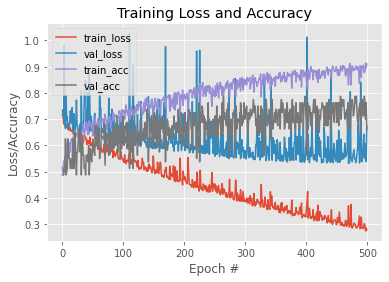

              precision    recall  f1-score   support

       brush       0.60      0.90      0.72        39
        comb       0.82      0.44      0.57        41

    accuracy                           0.66        80
   macro avg       0.71      0.67      0.65        80
weighted avg       0.71      0.66      0.64        80
 [[35  4]
 [23 18]]


In [25]:
cnn.plot_history()
cnn.predict()
print(*cnn.review())

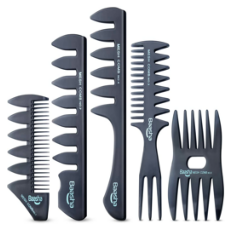

In [26]:
import cv2
import matplotlib.pyplot as plt
mat = cv2.imread(r"D:\VDKICombBrush\resources\Comb\image_100.png")
plt.imshow(mat)
plt.axis('off')
mat = sp2.preprocess(mat)
mat = iap.preprocess(mat)


In [27]:
import numpy as np
mat = np.array([mat])
mat = mat.astype("float") / 255.0

In [28]:
x = cnn.predict(mat)
choice = ["Comb", "Brush"]
print(choice[x[0]])

Comb
